# Loan predictions

## Problem Statement

We want to automate the loan eligibility process based on customer details that are provided as online application forms are being filled. You can find the dataset [here](https://drive.google.com/file/d/1h_jl9xqqqHflI5PsuiQd_soNYxzFfjKw/view?usp=sharing). These details concern the customer's Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and other things as well. 

|Variable| Description|
|: ------------- |:-------------|
|Loan_ID| Unique Loan ID|
|Gender| Male/ Female|
|Married| Applicant married (Y/N)|
|Dependents| Number of dependents|
|Education| Applicant Education (Graduate/ Under Graduate)|
|Self_Employed| Self employed (Y/N)|
|ApplicantIncome| Applicant income|
|CoapplicantIncome| Coapplicant income|
|LoanAmount| Loan amount in thousands|
|Loan_Amount_Term| Term of loan in months|
|Credit_History| credit history meets guidelines|
|Property_Area| Urban/ Semi Urban/ Rural|
|Loan_Status| Loan approved (Y/N)



### Explore the problem in following stages:

1. Hypothesis Generation – understanding the problem better by brainstorming possible factors that can impact the outcome
2. Data Exploration – looking at categorical and continuous feature summaries and making inferences about the data.
3. Data Cleaning – imputing missing values in the data and checking for outliers
4. Feature Engineering – modifying existing variables and creating new ones for analysis
5. Model Building – making predictive models on the data

## 1. Hypothesis Generation

Generating a hypothesis is a major step in the process of analyzing data. This involves understanding the problem and formulating a meaningful hypothesis about what could potentially have a good impact on the outcome. This is done BEFORE looking at the data, and we end up creating a laundry list of the different analyses which we can potentially perform if data is available.

#### Possible hypotheses
Which applicants are more likely to get a loan

1. Applicants having a credit history 
2. Applicants with higher applicant and co-applicant incomes
3. Applicants with higher education level
4. Properties in urban areas with high growth perspectives
5. Applicants who are married
6. Applicants with fewer dependents
7. Applicants who are not self-employed
8. Applicants applying for a lower loan amount
9. Applicants applying for a shorter-term loan

Do more brainstorming and create some hypotheses of your own. Remember that the data might not be sufficient to test all of these, but forming these enables a better understanding of the problem.

## 2. Data Exploration
Let's do some basic data exploration here and come up with some inferences about the data. Go ahead and try to figure out some irregularities and address them in the next section. 

In [1]:
! pip install flask_restful

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import pickle
sns.set()
pd.set_option('display.max_rows', None)

df = pd.read_csv("..\data\data.csv") 
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
df.shape

(614, 13)

In [4]:
# check for duplicate Loan_IDs
df['Loan_ID'].nunique() - len(df)

0

In [5]:
df.replace({
    "Loan_Status" : {'Y' : 1, 'N' : 0},
    }, inplace=True)

In [6]:
df = df.rename({
    'Self_Employed': 'Self Employed', 
    'ApplicantIncome': 'Applicant Income',
    'CoapplicantIncome': 'Coapplicant Income', 
    'LoanAmount': 'Loan Amount',
    'Loan_Amount_Term': 'Loan Amount Term',
    'Credit_History': 'Credit History',
    'Property_Area': 'Property Area',
    'Loan_Status': 'Loan Status'}, axis=1)

In [7]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self Employed,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History,Property Area,Loan Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1


In [8]:
# creating target variable
y = df["Loan Status"]
df = df.drop(columns=["Loan Status","Loan_ID"]) # Loan_ID is just a unique value for each record - doesn't add any information

In [9]:
# train/test split
from sklearn.model_selection import train_test_split
df_train, df_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=123) # small dataset, so use a relatively smaller portion for test data in order to keep as much data as possible to train the model
print(df_train.shape)
print(df_test.shape)
print(y_train.shape)
print(y_test.shape)

(491, 11)
(123, 11)
(491,)
(123,)


In [10]:
# identify categorical and numeric features
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [11]:
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area']

In [12]:
num_feats

['Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 'Credit History']

One of the key challenges in any data set are missing values. Lets start by checking which columns contain missing values.

In [13]:
df_train.isnull().sum()

Gender                 8
Married                3
Dependents            14
Education              0
Self Employed         24
Applicant Income       0
Coapplicant Income     0
Loan Amount           17
Loan Amount Term      13
Credit History        40
Property Area          0
dtype: int64

In [14]:
# percentage of nulls in each column

100*(df_train.isnull().sum()/len(df_train))

Gender                1.629328
Married               0.610998
Dependents            2.851324
Education             0.000000
Self Employed         4.887984
Applicant Income      0.000000
Coapplicant Income    0.000000
Loan Amount           3.462322
Loan Amount Term      2.647658
Credit History        8.146640
Property Area         0.000000
dtype: float64

In [15]:
y_train.isnull().sum()

0

Look at some basic statistics for numerical variables.

In [16]:
df_train[num_feats].describe()

,Applicant Income,Coapplicant Income,Loan Amount,Loan Amount Term,Credit History
count,491.000000,491.000000,474.000000,478.000000,451.000000
mean,5161.564155,1501.276823,143.786920,341.673640,0.844789
std,5202.049409,2411.057647,81.299689,65.990614,0.362507
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2923.500000,0.000000,100.000000,360.000000,1.000000
50%,3846.000000,1010.000000,126.000000,360.000000,1.000000
75%,5717.000000,2292.500000,168.000000,360.000000,1.000000
max,81000.000000,33837.000000,650.000000,480.000000,1.000000


1. How many applicants have a `Credit_History`? (`Credit_History` has value 1 for those who have a credit history and 0 otherwise)
2. Is the `ApplicantIncome` distribution in line with your expectation? Similarly, what about `CoapplicantIncome`?
3. Tip: Can you see a possible skewness in the data by comparing the mean to the median, i.e. the 50% figure of a feature.



In [17]:
# How many applicants have a Credit_History:
has_CH = round(df_train['Credit History'].sum())
applicants = df_train['Credit History'].count()
percent_has_CH = round((100*has_CH / applicants),2)

print(f'Out of {applicants} applicants, {has_CH} applicants ({percent_has_CH}%) have a credit history.')

Out of 451 applicants, 381 applicants (84.48%) have a credit history.


<AxesSubplot: xlabel='Coapplicant Income', ylabel='Count'>

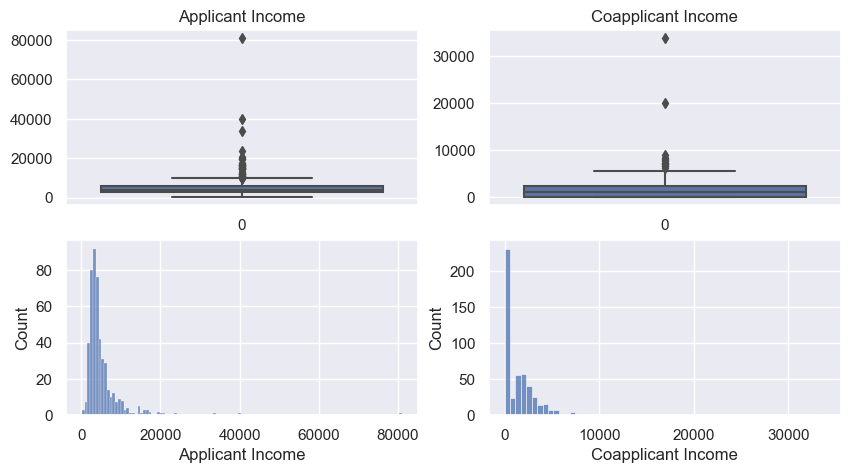

In [18]:
fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,5))

sns.boxplot(ax=axes[0][0], data=df_train['Applicant Income'])
axes[0][0].set_title('Applicant Income')
sns.boxplot(ax=axes[0][1], data=df_train['Coapplicant Income'])
axes[0][1].set_title(f'Coapplicant Income')
sns.histplot(ax=axes[1][0], data=df_train['Applicant Income'])
sns.histplot(ax=axes[1][1], data=df_train['Coapplicant Income'])

C:\Users\User\AppData\Roaming\Python\Python39\site-packages\seaborn\categorical.py:470: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  plot_data = [np.asarray(s, float) for k, s in iter_data]


<AxesSubplot: >

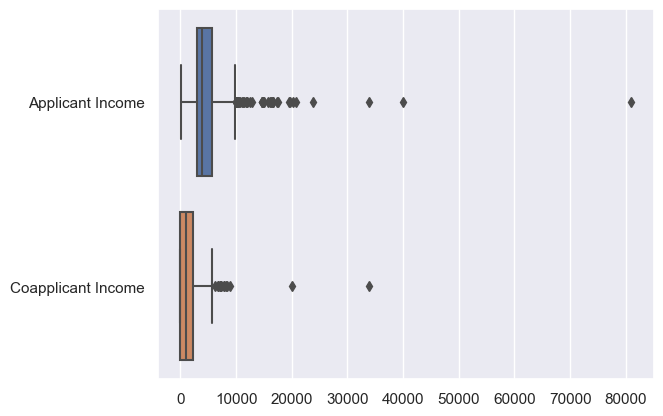

In [19]:
sns.boxplot(data=df_train[['Applicant Income','Coapplicant Income']], orient='h')

In [20]:
# Applicant and coapplicant income are both positively skewed because of outliers with very large income values. It seems likely, based on the other datapoints, that some of the outliers are errors (perhaps an extra zero was added to an income of 8000 to give 80000)

<AxesSubplot: xlabel='Loan Amount Term', ylabel='Count'>

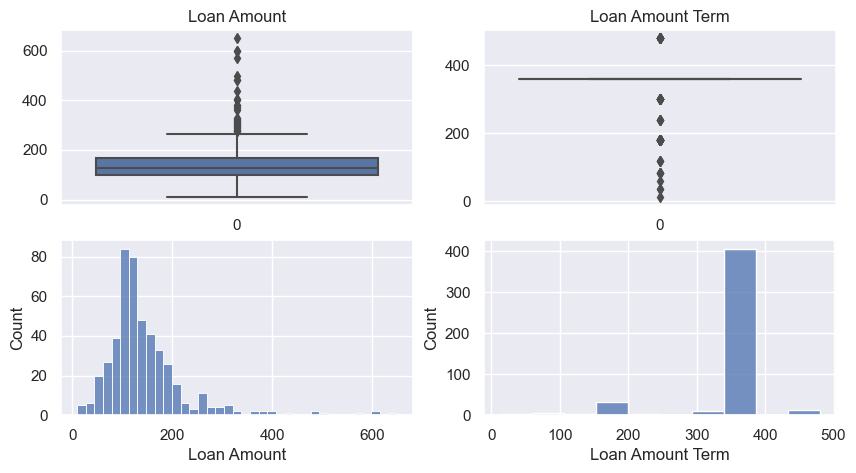

In [21]:
fig, axes = plt.subplots(2,2, sharex=False, figsize=(10,5))

sns.boxplot(ax=axes[0][0], data=df_train['Loan Amount'])
axes[0][0].set_title('Loan Amount')
sns.boxplot(ax=axes[0][1], data=df_train['Loan Amount Term'])
axes[0][1].set_title(f'Loan Amount Term')
sns.histplot(ax=axes[1][0], data=df_train['Loan Amount'])
sns.histplot(ax=axes[1][1], data=df_train['Loan Amount Term'])

Let's discuss nominal (categorical) variable. Look at the number of unique values in each of them.

In [22]:
for feat in cat_feats:
    print(f'{feat} categories: {df_train[feat].nunique()}')

Gender categories: 2
Married categories: 2
Dependents categories: 4
Education categories: 2
Self Employed categories: 2
Property Area categories: 3


In [23]:
def uni_analyis_categorical(df, feature):
    
    import pandas as pd
    import matplotlib.pyplot as plt
    import seaborn as sns
    import matplotlib.transforms as mtrans

    fig, ax = plt.subplots(figsize=(10,5))
    sns.countplot(data = df, y = feature, order = df[feature].value_counts().index, orient='h', palette = 'magma')
    plt.title(f'{feature} frequency')

    cat_count = df[feature].nunique()

    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0, 10, f'Number of categories : {cat_count}', ha='center')
    txt.set_transform(trans)

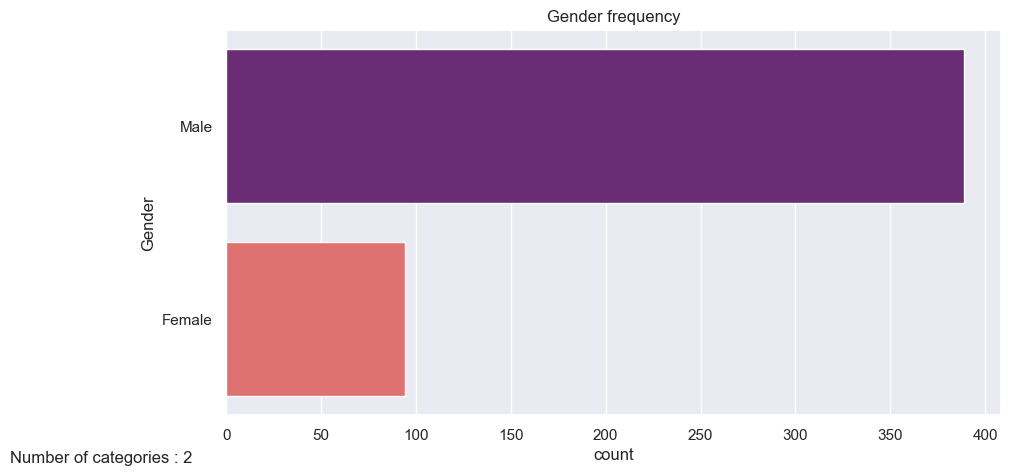

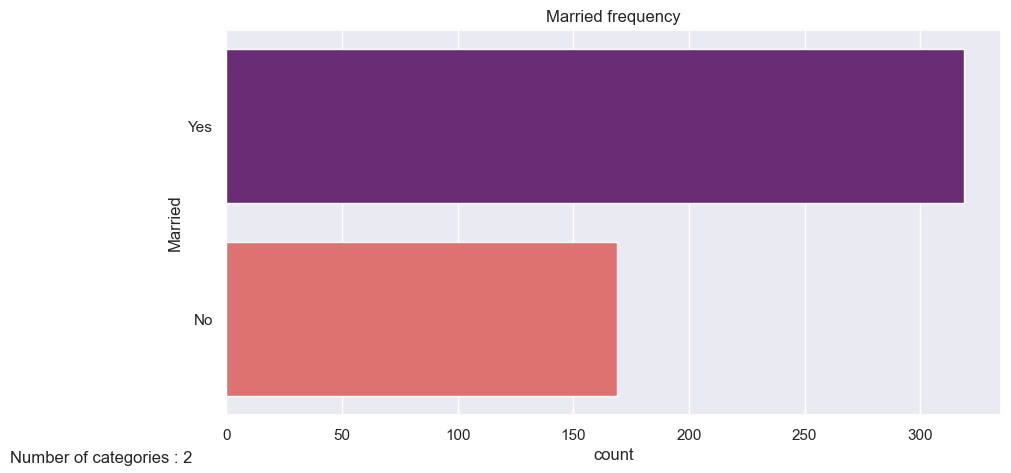

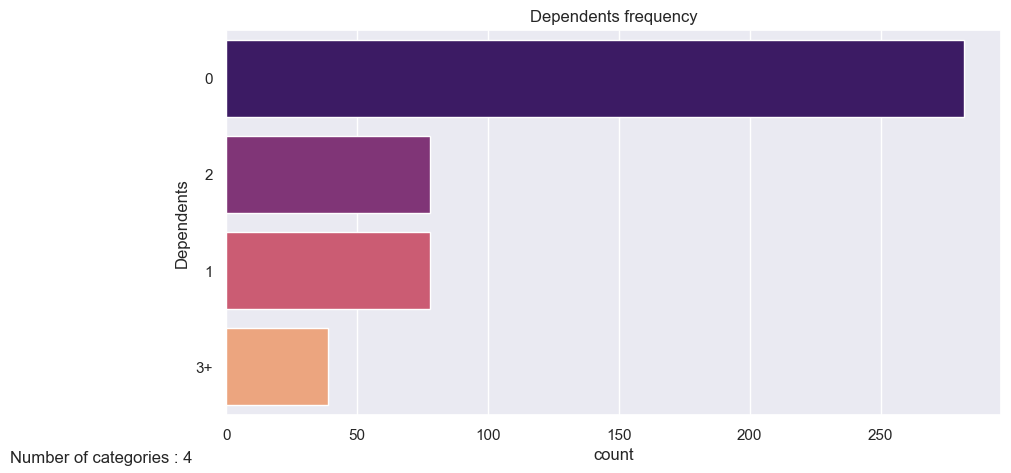

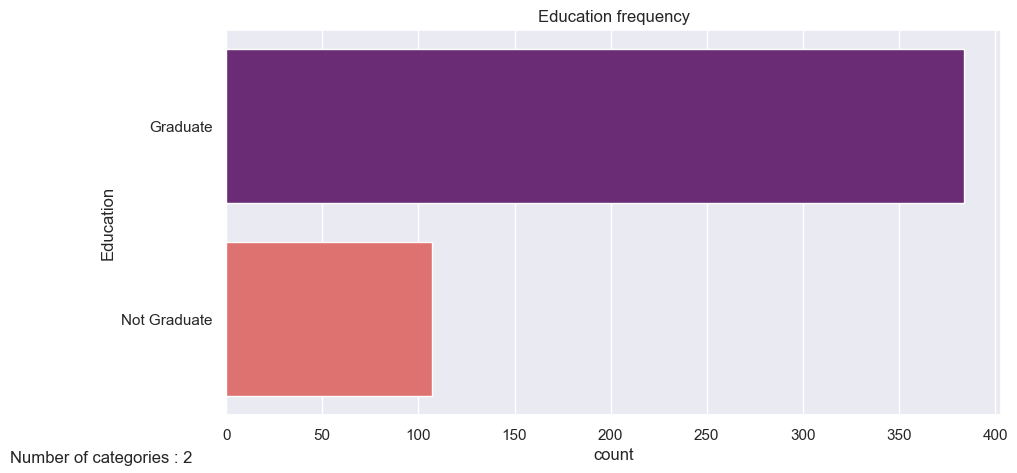

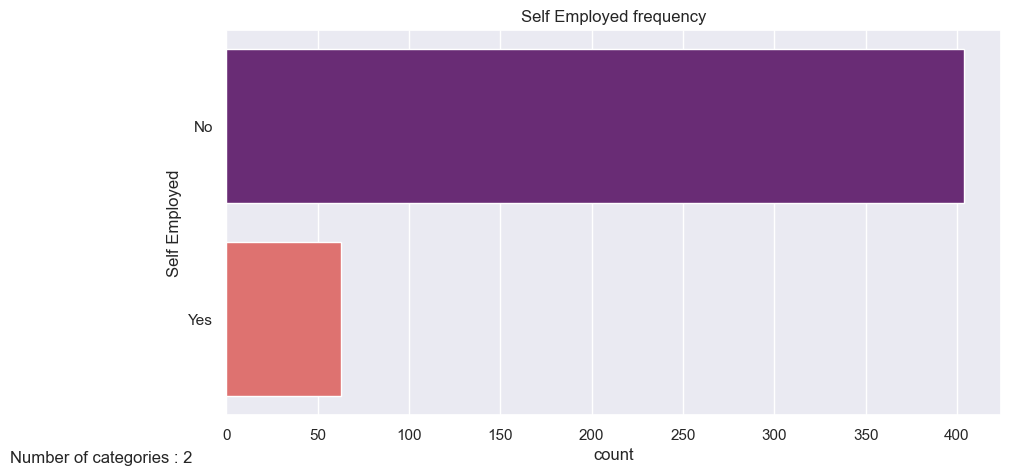

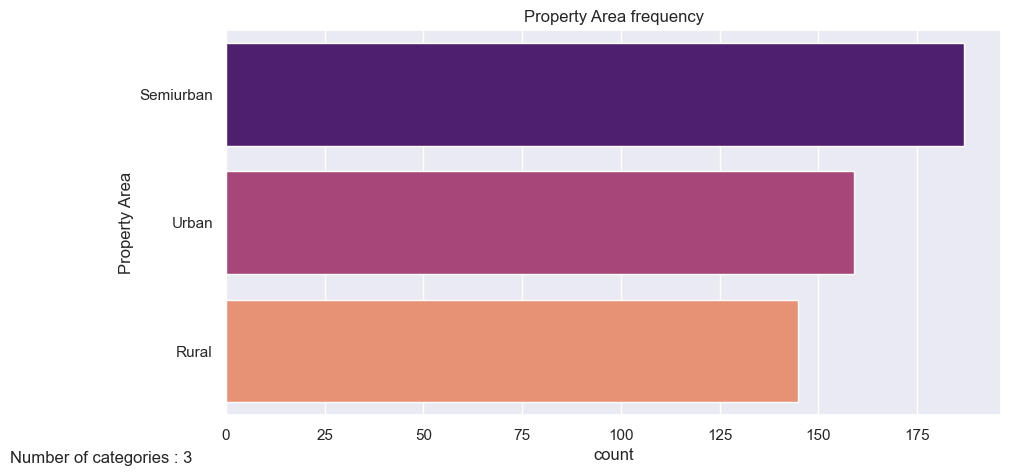

In [24]:
for feat in cat_feats:
    uni_analyis_categorical(df_train, feature=feat)

Explore further using the frequency of different categories in each nominal variable. Exclude the ID obvious reasons.

### Distribution analysis

Study distribution of various variables. Plot the histogram of ApplicantIncome, try different number of bins.



In [25]:
def uni_analyis_continuous(df, feature, feature_title):
    
    import matplotlib.pyplot as plt
    import matplotlib.transforms as mtrans

    fig, axes = plt.subplots(1,2, sharex=False, figsize=(10,5))
    fig.suptitle(f'Univariate Analysis - {feature_title}')

    sns.boxplot(ax=axes[0], data=df[feature])
    axes[0].set_title(f'{feature_title} Boxplot')
    sns.histplot(ax=axes[1], data=df[feature])
    axes[1].set_title(f'{feature_title} Histogram')

    Minimum = min(df[feature])
    Median = df[feature].median()
    Mean = df[feature].mean()
    Maximum = max(df[feature])
    
    trans = mtrans.blended_transform_factory(fig.transFigure, mtrans.IdentityTransform())

    txt = fig.text(0.5,10, f'Minimum : {Minimum}, Median : {Median}, Mean : {Mean}, Maximum : {Maximum}', ha='center', va='center_baseline')
    txt.set_transform(trans)

In [26]:
num_feats

['Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 'Credit History']

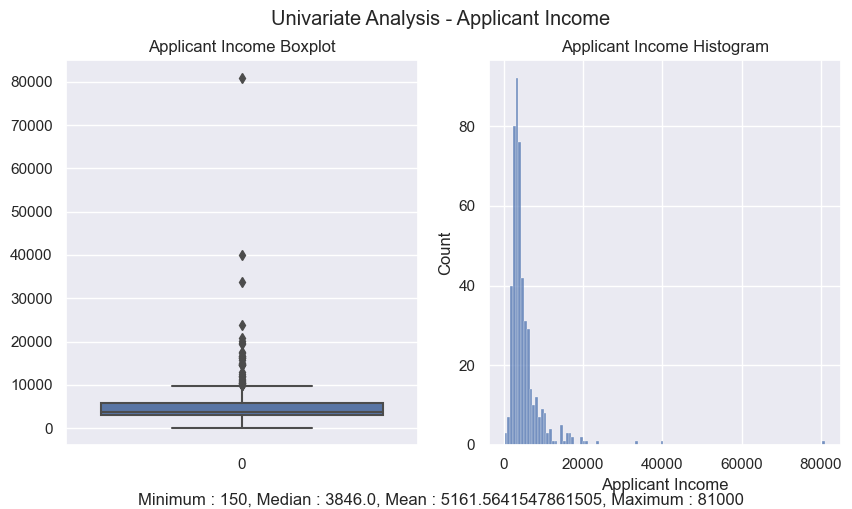

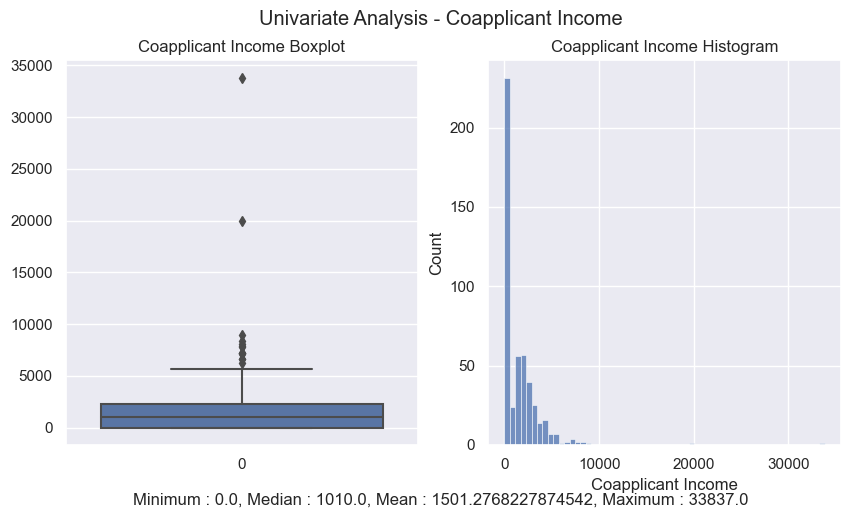

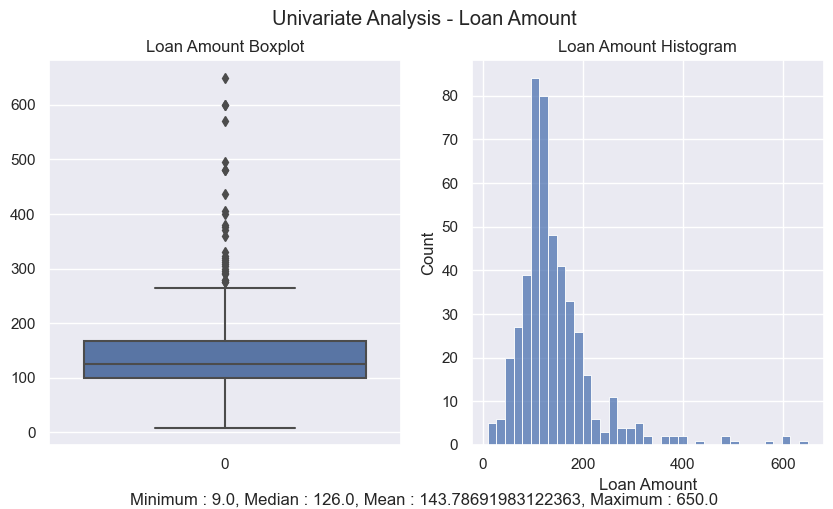

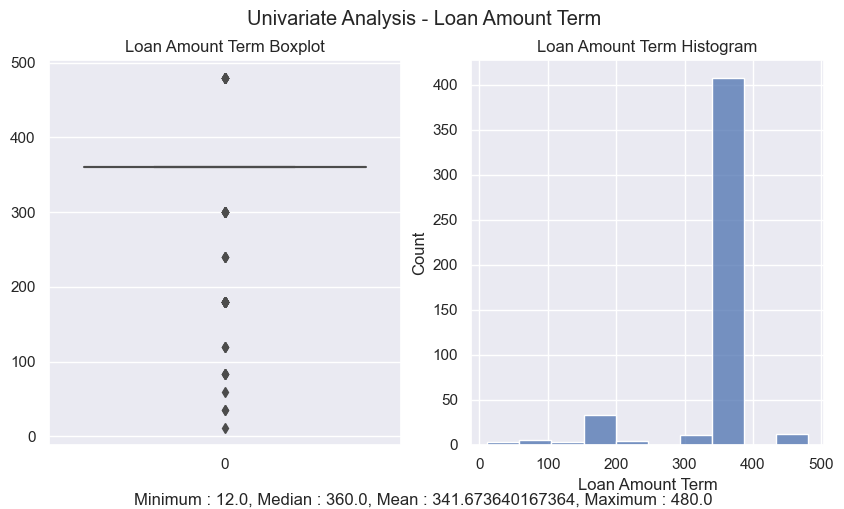

In [27]:
for feat in num_feats[:-1]:
    uni_analyis_continuous(df_train, feature=feat, feature_title=feat)

In [28]:
num_feats

['Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 'Credit History']

In [29]:
def plot_histograms(df, feat, binwidthlst):
    
    fig, axes = plt.subplots(1,len(binwidthlst), sharex=False, figsize=(10,5))
    fig.suptitle(f'{feat}')
    
    for i in range(len(binwidthlst)):

        sns.histplot(ax=axes[i], data=df[feat], binwidth=binwidthlst[i])
        axes[i].set_title(f'Bin Width: {binwidthlst[i]}')

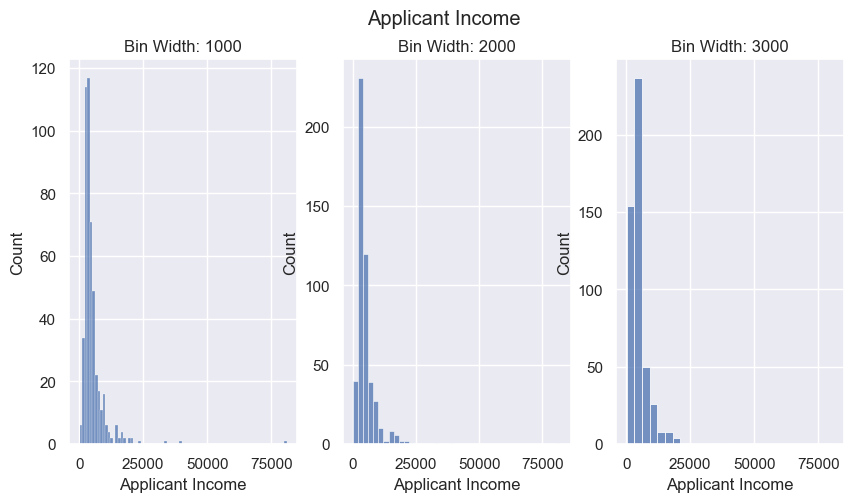

In [30]:
plot_histograms(df=df_train, feat='Applicant Income', binwidthlst=[1000,2000,3000])


Look at box plots to understand the distributions. 

Look at the distribution of income segregated  by `Education`

In [31]:
df_train['Education'].value_counts()

Graduate        384
Not Graduate    107
Name: Education, dtype: int64

In [32]:
grad = df_train[['Applicant Income']].loc[df_train['Education']=='Graduate']
n_grad = df_train[['Applicant Income']].loc[df_train['Education']=='Not Graduate']

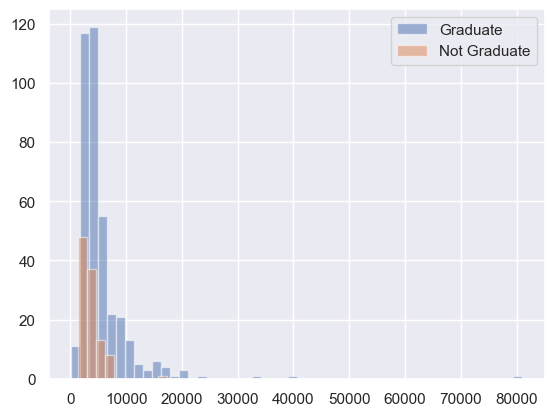

In [33]:
plt.hist(grad, bins=50, alpha=0.5, label='Graduate')
plt.hist(n_grad, bins=10, alpha=0.5, label='Not Graduate')
plt.legend(loc='upper right')
plt.show()

Look at the histogram and boxplot of LoanAmount

There might be some extreme values. Both `ApplicantIncome` and `LoanAmount` require some amount of data munging. `LoanAmount` has missing and well as extreme values values, while `ApplicantIncome` has a few extreme values, which demand deeper understanding. 

### Categorical variable analysis

Try to understand categorical variables in more details using `pandas.DataFrame.pivot_table` and some visualizations.

## 3. Data Cleaning

This step typically involves imputing missing values and treating outliers. 

### Imputing Missing Values

Missing values may not always be NaNs. For instance, the `Loan_Amount_Term` might be 0, which does not make sense.



Impute missing values for all columns. Use the values which you find most meaningful (mean, mode, median, zero.... maybe different mean values for different groups)

### Extreme values
Try a log transformation to get rid of the extreme values in `LoanAmount`. Plot the histogram before and after the transformation

Combine both incomes as total income and take a log transformation of the same.

## 4. Building a Predictive Model

Try paramater grid search to improve the results

## 5. Using Pipeline
If you didn't use pipelines before, transform your data prep, feat. engineering and modeling steps into Pipeline. It will be helpful for deployment.

The goal here is to create the pipeline that will take one row of our dataset and predict the probability of being granted a loan.

`pipeline.predict(x)`

In [34]:
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression

In [35]:
cat_feats = df.dtypes[df.dtypes == 'object'].index.tolist()
num_feats = df.dtypes[~df.dtypes.index.isin(cat_feats)].index.tolist()

In [44]:
cat_feats

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area']

In [46]:
num_feats

['Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 'Credit History']

In [36]:
# Using own function in Pipeline

# def numFeat(data):
#     return data[num_feats]

# def catFeat(data):
#     return data[cat_feats]

In [37]:
# numFeat(df_train).head()

In [38]:
# catFeat(df_train).head()

In [39]:
# keep_num = FunctionTransformer(numFeat)
# keep_cat = FunctionTransformer(catFeat)

In [40]:
# class CatFeats:
#     def __init__(self, data):
#         self.data = data

#     def fit(self, X, y=None):
#         pass

#     def transform(self, X, y=None):
#         cat_feats = self.data.dtypes[self.data.dtypes == 'object'].index.tolist()
#         return X[cat_feats]

#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X)

# class NumFeats:
#     def __init__(self, data):
#         self.data = data

#     def fit(self, X, y=None):
#         pass

#     def transform(self, X, y=None):
#         cat_feats = self.data.dtypes[self.data.dtypes == 'object'].index.tolist()
#         num_feats = self.data.dtypes[~self.data.dtypes.index.isin(cat_feats)].index.tolist()
#         return X[num_feats]

#     def fit_transform(self, X, y=None):
#         self.fit(X)
#         return self.transform(X)

In [47]:
categorical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='most_frequent')),
                                    ('ohe',OneHotEncoder(sparse=False))])

numerical_preprocessing = Pipeline([('imputation', SimpleImputer(strategy='mean')),
                                    ('scaling', StandardScaler())])

preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, ['Applicant Income',
 'Coapplicant Income',
 'Loan Amount',
 'Loan Amount Term',
 'Credit History']),
                                    ('categorical', categorical_preprocessing, ['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self Employed',
 'Property Area'])])

# feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
#                               ('select_best', SelectKBest(k=3))])

pipeline = Pipeline([('preprocessing', preprocessing),
                    # ('selection', feature_union),
                    ('model',LogisticRegression())])

pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term',
                                                   'Credit History']),
                                                 ('categorical',
                                                  Pipeline(steps=[('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area'])])),
                ('model', LogisticRegression())])

In [ ]:
# categorical_preprocessing = Pipeline([('keep_cat', FunctionTransformer(catFeat)),
#                                     ('imputation', SimpleImputer(strategy='most_frequent')),
#                                     ('ohe',OneHotEncoder(sparse=False))])

# numerical_preprocessing = Pipeline([('keep_num', FunctionTransformer(numFeat)),
#                                     ('imputation', SimpleImputer(strategy='mean')),
#                                     ('scaling', StandardScaler())])

# preprocessing = ColumnTransformer([('numeric', numerical_preprocessing, num_feats),
#                                     ('categorical', categorical_preprocessing, cat_feats)])

# # feature_union = FeatureUnion([('pca', PCA(n_components=3)), 
# #                               ('select_best', SelectKBest(k=3))])

# pipeline = Pipeline([('preprocessing', preprocessing),
#                     # ('selection', feature_union),
#                     ('model',LogisticRegression())])

# pipeline.fit(df_train, y_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('numeric',
                                                  Pipeline(steps=[('keep_num',
                                                                   FunctionTransformer(func=<function numFeat at 0x000001E3227B6CA0>)),
                                                                  ('imputation',
                                                                   SimpleImputer()),
                                                                  ('scaling',
                                                                   StandardScaler())]),
                                                  ['Applicant Income',
                                                   'Coapplicant Income',
                                                   'Loan Amount',
                                                   'Loan Amount Term',
                                                   'Credit History']),
                                                 ('categorical',
                                                  Pipeline(steps=[('keep_cat',
                                                                   FunctionTransformer(func=<function catFeat at 0x000001E32208F8B0>)),
                                                                  ('imputation',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(sparse=False))]),
                                                  ['Gender', 'Married',
                                                   'Dependents', 'Education',
                                                   'Self Employed',
                                                   'Property Area'])])),
                ('model', LogisticRegression())])

In [48]:
pickle.dump(pipeline, open("..\data\model1.pkl", "wb" ))

In [49]:
print(f'Training score: {pipeline.score(df_train, y_train)}')
print(f'Test score: {pipeline.score(df_test, y_test)}')

Training score: 0.814663951120163
Test score: 0.7886178861788617


In [73]:
y_pred = pipeline.predict(df_test)

y_compare = pd.DataFrame([y_test.to_numpy(), y_pred], index=['y_test', 'y_pred'])
y_compare.T.head()

,y_test,y_pred
0,0,1
1,1,1
2,1,1
3,1,1
4,1,0


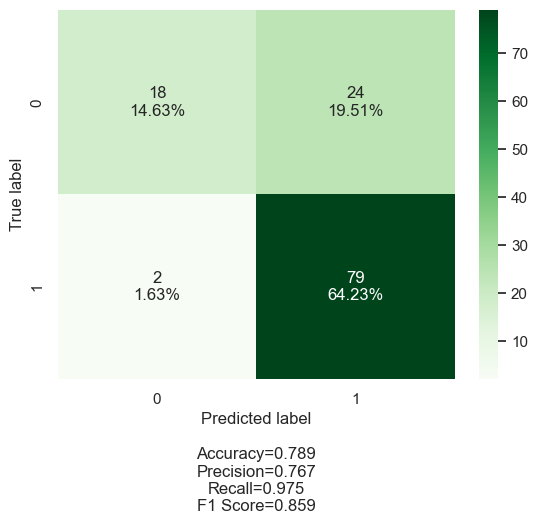

In [ ]:
import sys
import os
from sklearn.metrics import confusion_matrix

# adding python_functions subfolder to the system path
var = os.environ['PYTHONPATH']
sys.path.insert(0, var)
    
# importing the make_confusion_matrix
from confusion_matrix import make_confusion_matrix
# (refer to https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea for code)

cf_matrix = confusion_matrix(y_test, y_pred)

# calling make_confusion_matrix function
result = make_confusion_matrix(cf_matrix, cmap = 'Greens')

## 6. Deploy your model to cloud and test it with PostMan, BASH or Python

In [67]:
json_data = df_test.iloc[10,:].to_dict()

In [68]:
json_data

{'Gender': 'Female',
 'Married': 'Yes',
 'Dependents': '0',
 'Education': 'Graduate',
 'Self Employed': 'No',
 'Applicant Income': 2645,
 'Coapplicant Income': 3440.0,
 'Loan Amount': 120.0,
 'Loan Amount Term': 360.0,
 'Credit History': 0.0,
 'Property Area': 'Urban'}

In [69]:
import requests
URL = "http://127.0.0.1:5000/scoring"
# sending get request and saving the response as response object 
r = requests.post(url = URL, json = json_data) 

In [70]:
print(r.json())

[[0.9003376197829358, 0.09966238021706418]]


In [72]:
y_test.iloc[10]

0

In [63]:
y_test

583    0
11     1
443    1
442    1
267    1
230    1
368    1
203    1
181    0
572    1
48     0
511    1
565    1
320    1
483    1
374    1
162    0
386    1
405    1
494    0
202    0
132    1
509    1
277    1
488    1
314    0
57     0
164    1
308    0
78     0
520    1
54     0
448    0
417    0
577    1
237    1
138    0
285    1
361    1
243    1
151    1
35     1
43     1
526    1
376    1
503    0
532    0
284    0
82     0
190    1
177    0
9      0
196    1
156    1
338    0
261    1
545    1
333    1
131    1
344    1
5      1
400    0
508    1
221    1
327    1
102    1
31     0
292    1
280    0
609    1
200    1
272    1
379    1
498    1
600    0
516    1
66     0
514    0
242    1
487    0
229    1
170    1
593    1
75     0
539    1
576    0
13     0
427    1
287    1
297    1
403    1
201    1
79     1
519    0
107    0
378    0
205    1
534    1
468    1
159    1
449    0
273    1
533    0
172    0
192    0
85     1
249    1
150    0
275    1
552    1
59     1
1